Description

In [ ]:
# Fig nested loxP / VloxP sites 
# three bioreplicates 
# will be Figure 1 end 

# Import Functions and set directories

In [1]:
import functions_paper_1
import importlib
from functions_paper_1 import *
exec(open("functions_paper_1.py").read())
# Local path to Sharepoint (on your computer, change if you are a different user)
#datadir = Path(Path('../../datadir_srk.txt').read_text())
datadir = Path(Path('../datadir_yb.txt').read_text())
datadir = Path(Path('../../datadir_srk.txt').read_text())

figure_folder = './figs_2024_promoter_editing_paper/fig_nested'

# Import Data

In [2]:
#Check to make sure that datadir in "Set Directories" corresponds to the local path on your computer 

In [3]:
# Import Data, BioA
biorep = 'BioA'

folder = '20240401flow_exp20240329_p1_BioA_nested'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
#rd.plot.plot_well_metadata(yaml_path)
dataA1 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
dataA1['bioreplicate']=biorep 

folder = '20240401flow_exp20240329_p2_BioA_nested'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
#rd.plot.plot_well_metadata(yaml_path)
dataA2 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
dataA2['bioreplicate']=biorep 


In [4]:
# Import Data, BioB
biorep = 'BioB'

folder = '20240401flow_exp20240329_p1_BioB_nested'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
#rd.plot.plot_well_metadata(yaml_path)
dataB1 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
dataB1['bioreplicate']=biorep 

folder = '20240401flow_exp20240329_p2_BioB_nested'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
#rd.plot.plot_well_metadata(yaml_path)
dataB2 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
dataB2['bioreplicate']=biorep 


In [5]:
# Import Data, BioC
biorep = 'BioC'

folder = '20240401flow_exp20240329_p1_BioC_nested'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
#rd.plot.plot_well_metadata(yaml_path)
dataC1 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
dataC1['bioreplicate']=biorep 

folder = '20240401flow_exp20240329_p2_BioC_nested'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
#rd.plot.plot_well_metadata(yaml_path)
dataC2 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
dataC2['bioreplicate']=biorep 


## Concatenate Data, Gate on iRFP670, add conditions

In [6]:
data = pd.concat( [dataA1, dataA2, dataB1, dataB2, dataC1, dataC2], ignore_index=True)

In [7]:
data = data[ data['mCherry-A'] >0]
data = data[ data['mGL-A'] >0]
data = data[ data['TagBFP-A'] >0]
data = data[ data['Janelia Fluor 549-A'] >0]
data = data[ data['iRFP670-A'] >0]
data['log10 mGL-A'] = np.log10(data['mGL-A'])

data['cond'] = data['reporter'] + '.' + data['ZF'] + '.' + data['Cre'] + '.' + data['VCre']
data['cond2'] = data['ZF'] + '.' + data['Cre'] + '.' + data['VCre']
data['cond_biorep'] = data['cond'] + '_' + data['bioreplicate']


iRFP670_gate = 20000 
#figure_folder = figure_folder  + '/nest' + str(iRFP670_gate/10000) + '_'

figure_folder = figure_folder  + '/2e3/' + str(iRFP670_gate/10000) + '_'
data_iRFP670gated = data[ data['iRFP670-A'] > iRFP670_gate]


In [8]:
# Make a list of all the cond. This will be used for the order later on 
cond_list = pd.unique( data_iRFP670gated['cond'])
display(cond_list)

cond_list2= pd.unique( data_iRFP670gated['cond2'])
display(cond_list2)

repts= pd.unique( data_iRFP670gated['ZF'])
display(repts)



array(['pTET57B_loxPcon.ZF43.noCre.noVCre',
       'pTET80-1_nested_long.ZF43.noCre.noVCre',
       'pTET80-2_nested_short.ZF43.noCre.noVCre',
       'pTET114_VloxPcon.ZF43.noCre.noVCre',
       'pTET57B_loxPcon.ZF43.0.1xCre.noVCre',
       'pTET80-1_nested_long.ZF43.0.1xCre.noVCre',
       'pTET80-2_nested_short.ZF43.0.1xCre.noVCre',
       'pTET114_VloxPcon.ZF43.0.1xCre.noVCre',
       'pTET57B_loxPcon.ZF43.noCre.0.1xVCre',
       'pTET80-1_nested_long.ZF43.noCre.0.1xVCre',
       'pTET80-2_nested_short.ZF43.noCre.0.1xVCre',
       'pTET114_VloxPcon.ZF43.noCre.0.1xVCre',
       'pTET57B_loxPcon.ZF43.0.1xCre.0.1xVCre',
       'pTET80-1_nested_long.ZF43.0.1xCre.0.1xVCre',
       'pTET80-2_nested_short.ZF43.0.1xCre.0.1xVCre',
       'pTET114_VloxPcon.ZF43.0.1xCre.0.1xVCre',
       'pTET57B_loxPcon.ZF37.noCre.noVCre',
       'pTET80-1_nested_long.ZF37.noCre.noVCre',
       'pTET80-2_nested_short.ZF37.noCre.noVCre',
       'pTET114_VloxPcon.ZF37.noCre.noVCre',
       'pTET57B_loxPcon.ZF37

array(['ZF43.noCre.noVCre', 'ZF43.0.1xCre.noVCre', 'ZF43.noCre.0.1xVCre',
       'ZF43.0.1xCre.0.1xVCre', 'ZF37.noCre.noVCre',
       'ZF37.0.1xCre.noVCre', 'ZF37.noCre.0.1xVCre',
       'ZF37.0.1xCre.0.1xVCre', 'noZF.noCre.noVCre',
       'noZF.0.1xCre.noVCre', 'noZF.noCre.0.1xVCre',
       'noZF.0.1xCre.0.1xVCre', <NA>], dtype=object)

array(['ZF43', 'ZF37', 'noZF', <NA>], dtype=object)

# Overlay reps in Histograms__ overlaying by reporter only (all ZF together)

In [ ]:
#set the hue, hue_order, palette 
hue = 'cond2'; hue_order = None

palette = {
           'ZF43.noCre.noVCre': 'lightblue', 
           'ZF43.noCre.0.1xVCre': 'deepskyblue', 
           'ZF43.0.1xCre.noVCre': 'blue',
              'ZF43.0.1xCre.0.1xVCre': 'darkblue',
       'ZF37.noCre.noVCre': 'peachpuff', 
       'ZF37.noCre.0.1xVCre': 'darksalmon' ,
       'ZF37.0.1xCre.noVCre': 'red',
       'ZF37.0.1xCre.0.1xVCre': 'darkred', 
       
       'noZF.noCre.noVCre': 'lightgray', 
       'noZF.noCre.0.1xVCre': 'silver' ,
       'noZF.0.1xCre.noVCre': 'gray',
       'noZF.0.1xCre.0.1xVCre': 'black'}


ZFs = pd.array(['ZF43.0.1xCre.noVCre', 'ZF43.noCre.0.1xVCre', 'ZF43.noCre.noVCre',
       'ZF37.0.1xCre.noVCre', 'ZF37.noCre.0.1xVCre', 'ZF37.noCre.noVCre',
       'ZF43.0.1xCre.0.1xVCre', 'ZF37.0.1xCre.0.1xVCre'])

repts = pd.array(['pTET80-1_nested_long', 'pTET80-2_nested_short', 'pTET57B_loxPcon', 'pTET114_VloxPcon'])

#Iterate through the different conditions 
for rept in repts: 
    rept_short_name = {'pTET80-1_nested_long': '1-lng', 'pTET80-2_nested_short': '2-sh',  'pTET114_VloxPcon': 'Vlcon', 'pTET57B_loxPcon':'lcon'}
    rept_name = rept_short_name[rept]
    data_now = data_iRFP670gated[ data_iRFP670gated['reporter']== rept]
    plottitle = rept_name + 'hBFP'
    g = custom_density_plot(xcat='mGL-A',ycat='TagBFP-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order,legend=False, 
                            plottitle=plottitle, 
                            palette=palette, alpha=0, type = ['contour'])
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    
    plottitle = rept_name + 'hCh'
    g = custom_density_plot(xcat='mGL-A',ycat='mCherry-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order,legend=False, 
                            plottitle=plottitle, 
                            palette=palette, alpha=0, type = ['contour'])
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')



# Joint Histograms By reporter, by ZF

In [ ]:
#set the hue, hue_order, palette 
hue = 'cond2'; hue_order = None

palette = {
           'ZF43.noCre.noVCre': 'lightblue', 
           'ZF43.noCre.0.1xVCre': 'deepskyblue', 
           'ZF43.0.1xCre.noVCre': 'blue',
              'ZF43.0.1xCre.0.1xVCre': 'darkblue',
       'ZF37.noCre.noVCre': 'peachpuff', 
       'ZF37.noCre.0.1xVCre': 'darksalmon' ,
       'ZF37.0.1xCre.noVCre': 'red',
       'ZF37.0.1xCre.0.1xVCre': 'darkred', 
       'noZF.noCre.noVCre': 'lightgray', 
       'noZF.noCre.0.1xVCre': 'silver' ,
       'noZF.0.1xCre.noVCre': 'gray',
       'noZF.0.1xCre.0.1xVCre': 'black'}


ZFs = pd.array(['ZF43', 'ZF37', 'noZF'])

repts = pd.array(['pTET80-1_nested_long', 'pTET80-2_nested_short', 'pTET114_VloxPcon','pTET57B_loxPcon' ])

#Iterate through the different conditions 
for rept in repts: 
    rept_short_name = {'pTET80-1_nested_long': '1-lng', 'pTET80-2_nested_short': '2-sh',  'pTET114_VloxPcon': 'Vlcon', 'pTET57B_loxPcon':'lcon'}
    rept_name = rept_short_name[rept]
    data_now = data_iRFP670gated[ data_iRFP670gated['reporter']== rept]
    for ZFnow in ZFs: 
        data_now1 = data_now[ data_now['ZF'] == ZFnow]
        plottitle = rept_name + 'histBFP'
        g = custom_density_plot(xcat='mGL-A',ycat='TagBFP-A', hue=hue, data=data_now1, points = 10000, hue_order =hue_order,legend=False, 
                                plottitle=plottitle, 
                                palette=palette, alpha=0, type = ['contour'])
        plottitle = rept_name + 'histCh'
        g = custom_density_plot(xcat='mGL-A',ycat='mCherry-A', hue=hue, data=data_now1, points = 10000, hue_order =hue_order,legend=False, 
                                plottitle=plottitle, 
                                palette=palette, alpha=0, type = ['contour'])
        g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')



# One-axis histograms by reporter, by ZF

In [ ]:
#set the hue, hue_order, palette 


palette = {
           'ZF43.noCre.noVCre': 'lightblue', 
           'ZF43.noCre.0.1xVCre': 'deepskyblue', 
           'ZF43.0.1xCre.noVCre': 'blue',
              'ZF43.0.1xCre.0.1xVCre': 'darkblue',
       'ZF37.noCre.noVCre': 'peachpuff', 
       'ZF37.noCre.0.1xVCre': 'darksalmon' ,
       'ZF37.0.1xCre.noVCre': 'red',
       'ZF37.0.1xCre.0.1xVCre': 'darkred', 
       'noZF.noCre.noVCre': 'lightgray', 
       'noZF.noCre.0.1xVCre': 'silver' ,
       'noZF.0.1xCre.noVCre': 'gray',
       'noZF.0.1xCre.0.1xVCre': 'black'}

hue = 'cond2'; hue_order = None
parameters = pd.array(['mGL-A']) ;  xlim = [1e0,1e6]; 
xsize = 2.5/1.5
ysize = 1.5/1.5

ZFs = pd.array(['ZF43', 'ZF37', 'noZF'])

repts = pd.array(['pTET80-1_nested_long', 'pTET80-2_nested_short', 'pTET114_VloxPcon','pTET57B_loxPcon' ])

#Iterate through the different conditions 
for rept in repts: 
    rept_short_name = {'pTET80-1_nested_long': '1-lng', 'pTET80-2_nested_short': '2-sh',  'pTET114_VloxPcon': 'Vlcon', 'pTET57B_loxPcon':'lcon'}
    rept_name = rept_short_name[rept]
    data_now = data_iRFP670gated[ data_iRFP670gated['reporter']== rept]
    for ZFnow in ZFs: 
        if ZFnow == 'ZF43': hue_order = (['ZF43.noCre.noVCre', 'ZF43.noCre.0.1xVCre','ZF43.0.1xCre.noVCre', 'ZF43.0.1xCre.0.1xVCre'])
        elif ZFnow == 'ZF37': hue_order = (['ZF37.noCre.noVCre', 'ZF37.noCre.0.1xVCre','ZF37.0.1xCre.noVCre', 'ZF37.0.1xCre.0.1xVCre'])
        elif ZFnow == 'noZF': hue_order = (['noZF.noCre.noVCre', 'noZF.noCre.0.1xVCre','noZF.0.1xCre.noVCre', 'noZF.0.1xCre.0.1xVCre'])


        data_now1 = data_now[ data_now['ZF'] == ZFnow]
        #data_now1 = data_now1[ data_now1['bioreplicate']=='BioC']
        plottitle = rept_name + ' ' + ZFnow + 'Hist-mGL' + ' Allbio'
        #Plot histogram 
        g = plt.figure(figsize=(xsize,ysize))
        g = custom_hist_plot( data_now1, parameters, hue=hue, palette=palette, hueorder=hue_order, xsize=xsize, ysize=ysize, title=plottitle,legend=False, 
                            alpha=0.4,
                            legendtitle='Condition', xlim=xlim)
        g = g.get_figure()
        g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')    



In [ ]:
#set the hue, hue_order, palette 


palette = {
       'noZF.noCre.noVCre': 'gray',
       'ZF37.noCre.noVCre': '#C3DB9A', 
       'ZF37.noCre.0.1xVCre': '#A1CD3A' ,
       'ZF37.0.1xCre.noVCre': '#69B645' 
}

hue = 'cond2'; hue_order = palette
parameters = pd.array(['mGL-A']) ;  xlim = [1e0,1e5]; 
xsize = 2.5/1.5
ysize = 1.5/1.5
fontsize=15
repts = pd.array(['pTET80-2_nested_short'])

#Iterate through the different conditions 
data_now = data_iRFP670gated[ data_iRFP670gated['reporter']== 'pTET80-2_nested_short']
plottitle = 'nested' + 'Hist-mGL'
#Plot histogram 
g = plt.figure(figsize=(xsize,ysize))
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hue_order, xsize=xsize, ysize=ysize, title=plottitle, legend=False,
                     alpha=0.4, axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False}, fontsize=fontsize,
                     legendtitle='Condition', xlim=xlim)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')    



# Calc stats

In [9]:
repts = pd.array(['pTET80-1_nested_long', 'pTET80-2_nested_short', 'pTET57B_loxPcon', 'pTET114_VloxPcon'])
df = data_iRFP670gated[ data_iRFP670gated['reporter'].isin(repts)] #choose dataframe

#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['reporter', 'ZF', 'Cre','VCre','cond', 'cond2','bioreplicate'] #how to filter results, columns 
x = ['mGL-A', 'TagBFP-A','mCherry-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s_well = calc_stats(df,by,x,stat) #calculate statistics 

by = ['reporter', 'ZF', 'Cre','VCre','cond', 'cond2','bioreplicate'] #how to filter results, columns 
s_biorep = calc_stats(df,by,x,stat) #calculate statistics 

In [10]:
display(data_iRFP670gated[data_iRFP670gated['ZF']=='noZF'])

,reporter,ZF,Cre,VCre,well,population,FSC-A,FSC-H,FSC-W,SSC-A,...,Janelia Fluor 549-W,mCherry-A,mCherry-H,mCherry-W,Time,bioreplicate,log10 mGL-A,cond,cond2,cond_biorep
4517019,pTET57B_loxPcon,noZF,noCre,noVCre,A10,Single Cells,531824,227347,133,573386,...,51,190,85,0,0.232556,BioA,1.863323,pTET57B_loxPcon.noZF.noCre.noVCre,noZF.noCre.noVCre,pTET57B_loxPcon.noZF.noCre.noVCre_BioA
4517248,pTET57B_loxPcon,noZF,noCre,noVCre,A10,Single Cells,355178,209179,116,508410,...,38,65,68,0,0.672608,BioA,1.959041,pTET57B_loxPcon.noZF.noCre.noVCre,noZF.noCre.noVCre,pTET57B_loxPcon.noZF.noCre.noVCre_BioA
4517304,pTET57B_loxPcon,noZF,noCre,noVCre,A10,Single Cells,359088,227845,116,223316,...,24,60,58,0,0.837002,BioA,1.579784,pTET57B_loxPcon.noZF.noCre.noVCre,noZF.noCre.noVCre,pTET57B_loxPcon.noZF.noCre.noVCre_BioA
4517448,pTET57B_loxPcon,noZF,noCre,noVCre,A10,Single Cells,368070,209020,107,449131,...,34,81,80,0,1.220920,BioA,1.755875,pTET57B_loxPcon.noZF.noCre.noVCre,noZF.noCre.noVCre,pTET57B_loxPcon.noZF.noCre.noVCre_BioA
4517564,pTET57B_loxPcon,noZF,noCre,noVCre,A10,Single Cells,413177,216284,119,454367,...,28,94,55,0,1.401350,BioA,2.064458,pTET57B_loxPcon.noZF.noCre.noVCre,noZF.noCre.noVCre,pTET57B_loxPcon.noZF.noCre.noVCre_BioA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18491585,pTET114_VloxPcon,noZF,0.1xCre,0.1xVCre,D9,Single Cells,242621,158698,107,268287,...,33,135,69,0,45.454700,BioC,1.968483,pTET114_VloxPcon.noZF.0.1xCre.0.1xVCre,noZF.0.1xCre.0.1xVCre,pTET114_VloxPcon.noZF.0.1xCre.0.1xVCre_BioC
18491636,pTET114_VloxPcon,noZF,0.1xCre,0.1xVCre,D9,Single Cells,345096,215111,114,175144,...,30,11,75,0,45.578000,BioC,1.322219,pTET114_VloxPcon.noZF.0.1xCre.0.1xVCre,noZF.0.1xCre.0.1xVCre,pTET114_VloxPcon.noZF.0.1xCre.0.1xVCre_BioC
18491695,pTET114_VloxPcon,noZF,0.1xCre,0.1xVCre,D9,Single Cells,475782,222987,124,434204,...,32,18,54,0,45.702300,BioC,1.690196,pTET114_VloxPcon.noZF.0.1xCre.0.1xVCre,noZF.0.1xCre.0.1xVCre,pTET114_VloxPcon.noZF.0.1xCre.0.1xVCre_BioC
18491714,pTET114_VloxPcon,noZF,0.1xCre,0.1xVCre,D9,Single Cells,271503,176584,108,231091,...,21,34,56,0,45.771500,BioC,2.428135,pTET114_VloxPcon.noZF.0.1xCre.0.1xVCre,noZF.0.1xCre.0.1xVCre,pTET114_VloxPcon.noZF.0.1xCre.0.1xVCre_BioC


# Summary Plots, points = well or biorep

## Plot summary plot for all the desired statistics -- all the conditions together 


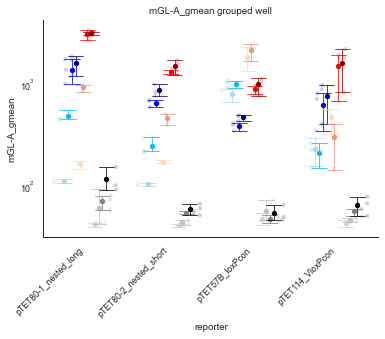

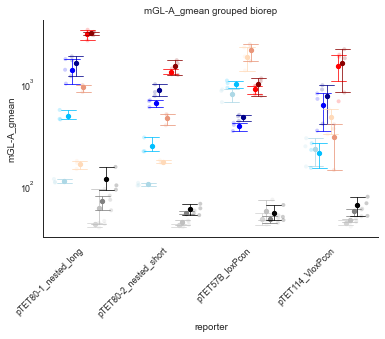

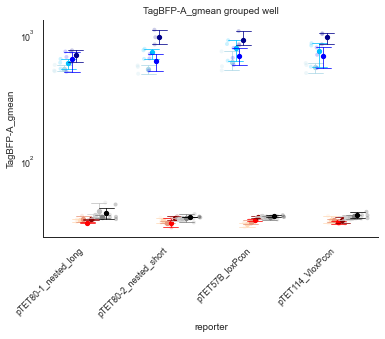

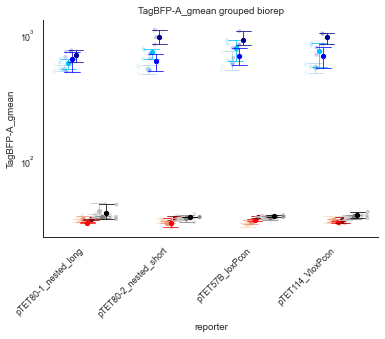

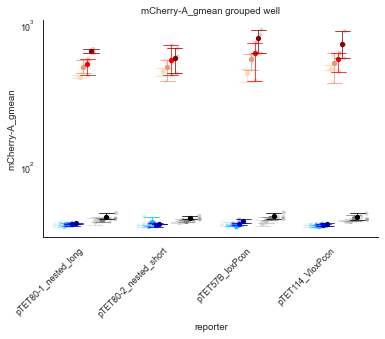

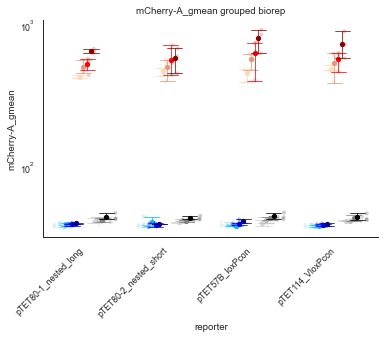

<Figure size 432x288 with 0 Axes>

In [11]:
#Plot summary plot for all the desired statistics -- all the conditions together 
palette = {
           'ZF43.noCre.noVCre': 'lightblue', 
           'ZF43.noCre.0.1xVCre': 'deepskyblue', 
           'ZF43.0.1xCre.noVCre': 'blue',
              'ZF43.0.1xCre.0.1xVCre': 'darkblue',
       'ZF37.noCre.noVCre': 'peachpuff', 
       'ZF37.noCre.0.1xVCre': 'darksalmon' ,
       'ZF37.0.1xCre.noVCre': 'red',
       'ZF37.0.1xCre.0.1xVCre': 'darkred', 
       
       'noZF.noCre.noVCre': 'lightgray', 
       'noZF.noCre.0.1xVCre': 'silver' ,
       'noZF.0.1xCre.noVCre': 'gray',
       'noZF.0.1xCre.0.1xVCre': 'black'}


ZFs = pd.array(['ZF43.0.1xCre.noVCre', 'ZF43.noCre.0.1xVCre', 'ZF43.noCre.noVCre',
       'ZF37.0.1xCre.noVCre', 'ZF37.noCre.0.1xVCre', 'ZF37.noCre.noVCre',
       'ZF43.0.1xCre.0.1xVCre', 'ZF37.0.1xCre.0.1xVCre'])

repts = pd.array(['pTET80-1_nested_long', 'pTET80-2_nested_short', 'pTET57B_loxPcon', 'pTET114_VloxPcon'])

hue = 'cond2'; hue_order = palette

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean'])
#set plotting parameters 
order_repts = repts
order = order_repts; palette = palette; hue_order = hue_order; x = 'reporter'; hue='cond2'
ylim = [1e2, 1e4]

#Only plot some reporters


#Set p-value significance comparisons 
pairs = [
        [(), ()],  
]

for stat in stats_plot:
    data_now = s_well
    y = stat # set the stat to plot
    yscale = 'log'
    plottitle = y + ' grouped well'
    g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                     #pairs=pairs, 
                     yscale=yscale, 
                     #ylim=ylim,
                    x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,legend=False)
    g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

    data_now = s_biorep
    y = stat # set the stat to plot
    yscale = 'log'
    plottitle = y + ' grouped biorep'
    g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                     #pairs=pairs, 
                     yscale=yscale, 
                     #ylim=ylim,
                    x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,legend=False)
    g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


## Summary Plots -- ZF grouping

In [ ]:
#Plot summary plot by ZF grouping 
palette = {
           'ZF43.noCre.noVCre': 'lightblue', 
           'ZF43.noCre.0.1xVCre': 'deepskyblue', 
           'ZF43.0.1xCre.noVCre': 'blue',
              'ZF43.0.1xCre.0.1xVCre': 'darkblue',
       'ZF37.noCre.noVCre': 'peachpuff', 
       'ZF37.noCre.0.1xVCre': 'darksalmon' ,
       'ZF37.0.1xCre.noVCre': 'red',
       'ZF37.0.1xCre.0.1xVCre': 'darkred', 
       
       'noZF.noCre.noVCre': 'lightgray', 
       'noZF.noCre.0.1xVCre': 'silver' ,
       'noZF.0.1xCre.noVCre': 'gray',
       'noZF.0.1xCre.0.1xVCre': 'black'}


ZFs = pd.array(['ZF43', 'ZF37', 'noZF'])

repts = pd.array(['pTET80-1_nested_long', 'pTET80-2_nested_short',  'pTET114_VloxPcon', 'pTET57B_loxPcon'])

hue = 'cond2'; hue_order = palette

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean'])
#set plotting parameters 
order_repts = repts
order = order_repts; palette = palette; hue_order = hue_order; x = 'reporter'; hue='cond2'
ylim = [2e1, 5e3]

#Only plot some reporters
data_now = s_well
#display(data_now)

#Set p-value significance comparisons 
pairs = [
        [(), ()],  
]

for stat in stats_plot:
    for ZFnow in ZFs:
        data_now = s_well[ s_well['ZF']== ZFnow]
        y = stat # set the stat to plot
        yscale = 'log'


        plottitle = y + ' ' + ZFnow + ' grouped well'
        g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                        #pairs=pairs, 
                        yscale=yscale, 
                        ylim=ylim,
                        x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle)
        g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

        data_now = s_biorep[ s_biorep['ZF']== ZFnow]
        y = stat # set the stat to plot
        yscale = 'log'
        plottitle = y + ' ' + ZFnow + ' grouped biorep'
        g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                        #pairs=pairs, 
                        yscale=yscale, 
                        ylim=ylim,
                        x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle)
        g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

hue = None 
x = 'cond2'


## only short spacer with controls

In [ ]:
#Plot summary plot by ZF grouping 
palette = {
           'ZF43.noCre.noVCre': 'lightblue', 
           'ZF43.noCre.0.1xVCre': 'deepskyblue', 
           'ZF43.0.1xCre.noVCre': 'blue',
              'ZF43.0.1xCre.0.1xVCre': 'darkblue',
       'ZF37.noCre.noVCre': 'peachpuff', 
       'ZF37.noCre.0.1xVCre': 'darksalmon' ,
       'ZF37.0.1xCre.noVCre': 'red',
       'ZF37.0.1xCre.0.1xVCre': 'darkred', 
       'noZF.noCre.noVCre': 'lightgray', 
       'noZF.noCre.0.1xVCre': 'silver' ,
       'noZF.0.1xCre.noVCre': 'gray',
       'noZF.0.1xCre.0.1xVCre': 'black'}


ZFs = pd.array(['ZF43', 'ZF37', 'noZF'])

repts = pd.array(['pTET80-2_nested_short',  'pTET114_VloxPcon', 'pTET57B_loxPcon'])

hue = 'cond2'; hue_order = palette

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean'])
#set plotting parameters 
order_repts = repts
order = order_repts; palette = palette; hue_order = hue_order; x = 'reporter'; hue='cond2'
ylim = [2e1, 5e3]

#Only plot some reporters
data_now = s_well
#display(data_now)

#Set p-value significance comparisons 
pairs = [
        [(), ()],  
]

for stat in stats_plot:
    for ZFnow in ZFs:
        data_now = s_well[ s_well['ZF']== ZFnow]
        y = stat # set the stat to plot
        yscale = 'log'


        plottitle = y + ' ' + ZFnow + ' grouped well nolong'
        g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                        #pairs=pairs, 
                        yscale=yscale, 
                        ylim=ylim,
                        aspect = 1.5, 
                        x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,legend=False)
        g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

        data_now = s_biorep[ s_biorep['ZF']== ZFnow]
        y = stat # set the stat to plot
        yscale = 'log'
        plottitle = y + ' ' + ZFnow + ' grouped biorep nolong'
        g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                        #pairs=pairs, 
                        yscale=yscale, 
                        aspect = 1.5, 
                        ylim=ylim,
                        x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,legend=False)
        g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


## one spacer at a time, ZF separate

In [ ]:
#Plot summary plot by ZF grouping 
palette = {
           'ZF43.noCre.noVCre': 'lightblue', 
           'ZF43.noCre.0.1xVCre': 'deepskyblue', 
           'ZF43.0.1xCre.noVCre': 'blue',
              'ZF43.0.1xCre.0.1xVCre': 'darkblue',
       'ZF37.noCre.noVCre': 'peachpuff', 
       'ZF37.noCre.0.1xVCre': 'darksalmon' ,
       'ZF37.0.1xCre.noVCre': 'red',
       'ZF37.0.1xCre.0.1xVCre': 'darkred', 
       'noZF.noCre.noVCre': 'lightgray', 
       'noZF.noCre.0.1xVCre': 'silver' ,
       'noZF.0.1xCre.noVCre': 'gray',
       'noZF.0.1xCre.0.1xVCre': 'black'}


ZFs = pd.array(['ZF43', 'ZF37', 'noZF'])
#Only plot some reporters
repts = pd.array(['pTET80-1_nested_long', 'pTET80-2_nested_short',  'pTET114_VloxPcon', 'pTET57B_loxPcon'])

#rept short names
rept_short_name = {'pTET80-1_nested_long': '1-lng', 'pTET80-2_nested_short': '2-sh',  'pTET114_VloxPcon': 'Vlcon', 'pTET57B_loxPcon':'lcon'}

hue = 'cond2'; hue_order = palette

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean'])
#set plotting parameters 
order_repts = repts
order = None; palette = palette;  x = 'reporter'; hue='cond2'
ylim = [2e1, 5e3]



#display(data_now)

#Set p-value significance comparisons 
pairs = [
        [(), ()],  
]
for rept in repts:
    rept_name = rept_short_name[rept]
    for stat in stats_plot:
        for ZFnow in ZFs:
            if ZFnow == 'ZF43': hue_order = (['ZF43.noCre.noVCre', 'ZF43.noCre.0.1xVCre','ZF43.0.1xCre.noVCre', 'ZF43.0.1xCre.0.1xVCre'])
            elif ZFnow == 'ZF37': hue_order = (['ZF37.noCre.noVCre', 'ZF37.noCre.0.1xVCre','ZF37.0.1xCre.noVCre', 'ZF37.0.1xCre.0.1xVCre'])
            elif ZFnow == 'noZF': hue_order = (['noZF.noCre.noVCre', 'noZF.noCre.0.1xVCre','noZF.0.1xCre.noVCre', 'noZF.0.1xCre.0.1xVCre'])

            y = stat # set the stat to plot
            yscale = 'log'


            data_now = s_well[ s_well['ZF']== ZFnow]
            data_now = data_now[ data_now['reporter']==rept]
            plottitle = y + ' ' + ZFnow + ' well ' + rept_name
            g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                            #pairs=pairs, 
                            yscale=yscale, 
                            ylim=ylim,
                            aspect = 3, 
                            x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,legend=False)
            g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

            data_now = s_biorep[ s_biorep['ZF']== ZFnow]
            data_now = data_now[ data_now['reporter']==rept]
            y = stat # set the stat to plot
            yscale = 'log'
            plottitle = y + ' ' + ZFnow + ' biorep ' + rept_name
            g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                            #pairs=pairs, 
                            yscale=yscale, 
                            aspect = 3, 
                            ylim=ylim,
                            x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,legend=False)
            g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


## one spacer at a time, ZF all together

In [ ]:
#Plot summary plot by ZF grouping 
palette = {'noZF.noCre.noVCre': 'lightgray', 
       'noZF.noCre.0.1xVCre': 'silver' ,
       'noZF.0.1xCre.noVCre': 'gray',
       'noZF.0.1xCre.0.1xVCre': 'black',
       'ZF37.noCre.noVCre': 'peachpuff', 
       'ZF37.noCre.0.1xVCre': 'darksalmon' ,
       'ZF37.0.1xCre.noVCre': 'red',
       'ZF37.0.1xCre.0.1xVCre': 'darkred',
           'ZF43.noCre.noVCre': 'lightblue', 
           'ZF43.noCre.0.1xVCre': 'deepskyblue', 
           'ZF43.0.1xCre.noVCre': 'blue',
              'ZF43.0.1xCre.0.1xVCre': 'darkblue',
       }


ZFs = pd.array(['ZF43', 'ZF37', 'noZF'])
#Only plot some reporters
repts = pd.array(['pTET80-1_nested_long', 'pTET80-2_nested_short',  'pTET114_VloxPcon', 'pTET57B_loxPcon'])

#rept short names
rept_short_name = {'pTET80-1_nested_long': '1-lng', 'pTET80-2_nested_short': '2-sh',  'pTET114_VloxPcon': 'Vlcon', 'pTET57B_loxPcon':'lcon'}

hue = None; 
hue_order = None

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean'])
#set plotting parameters 
order_repts = repts
order = palette;   x = 'cond2'; 
ylim = [2e1, 5e3]


#display(data_now)

#Set p-value significance comparisons 
pairs = [
        [(), ()],  
]

fontsize=15; xsize=5; ysize=2.5

for rept in repts:
    rept_name = rept_short_name[rept]
    for stat in stats_plot:
        y = stat # set the stat to plot
        yscale = 'log'
        data_now = s_well[ s_well['ZF'].isin(ZFs)]
        data_now = data_now[ data_now['reporter']==rept]
        plottitle = y + ' all ZF well ' + rept_name

        g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                        #pairs=pairs, 
                        yscale=yscale,
                        figsize = [xsize,ysize],
                        ylim=ylim,
                        x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,
                        fontsize=fontsize,legend=False)
        g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

        data_now = s_biorep[ s_biorep['ZF'].isin(ZFs)]
        data_now = data_now[ data_now['reporter']==rept]
        y = stat # set the stat to plot
        yscale = 'log'
        plottitle = y + ' all ZF biorep ' + rept_name
        g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                        #pairs=pairs, 
                        yscale=yscale, 
                        figsize = [xsize,ysize],
                        ylim=ylim,
                        x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle, 
                        fontsize=fontsize,legend=True)
        g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


## Fig 1 plot supplement _ Figure S7

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

noZF.noCre.noVCre v.s. noZF.noCre.0.1xVCre: t-test independent samples, P_val=1.122e-01 stat=-2.030e+00
noZF.noCre.0.1xVCre v.s. noZF.0.1xCre.noVCre: t-test independent samples, P_val=4.192e-03 stat=-5.876e+00
noZF.0.1xCre.noVCre v.s. noZF.0.1xCre.0.1xVCre: t-test independent samples, P_val=3.533e-01 stat=-1.049e+00
ZF37.noCre.noVCre v.s. ZF37.noCre.0.1xVCre: t-test independent samples, P_val=1.342e-03 stat=-7.972e+00
ZF37.noCre.0.1xVCre v.s. ZF37.0.1xCre.noVCre: t-test independent samples, P_val=1.763e-04 stat=-1.346e+01
ZF37.0.1xCre.noVCre v.s. ZF37.0.1xCre.0.1xVCre: t-test independent samples, P_val=2.863e-01 stat=-1.229e+00
ZF43.noCre.noVCre v.s. ZF43.noCre.0.1xVCre: t-test independent samples, P_val=6.185e-03 stat=-5.276e+00
ZF43.noCre.0.1xVCre v.s. ZF43.0.1xCre.noVCre: t-test independent samples, P_val=5.866e-04 stat=-

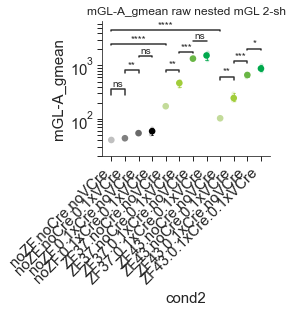

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

noZF.noCre.noVCre v.s. noZF.noCre.0.1xVCre: t-test independent samples, P_val=2.370e-01 stat=-1.390e+00
noZF.noCre.0.1xVCre v.s. noZF.0.1xCre.noVCre: t-test independent samples, P_val=3.467e-02 stat=-3.145e+00
noZF.0.1xCre.noVCre v.s. noZF.0.1xCre.0.1xVCre: t-test independent samples, P_val=3.373e-01 stat=-1.089e+00
ZF37.noCre.noVCre v.s. ZF37.noCre.0.1xVCre: t-test independent samples, P_val=1.999e-01 stat=1.534e+00
ZF37.noCre.0.1xVCre v.s. ZF37.0.1xCre.noVCre: t-test independent samples, P_val=4.624e-02 stat=-2.853e+00
ZF37.0.1xCre.noVCre v.s. ZF37.0.1xCre.0.1xVCre: t-test independent samples, P_val=8.520e-01 stat=-1.990e-01
ZF43.noCre.noVCre v.s. ZF43.noCre.0.1xVCre: t-test independent samples, P_val=7.405e-01 stat=3.550e-01
ZF43.noCre.0.1xVCre v.s. ZF43.0.1xCre.noVCre: t-test independent samples, P_val=4.612e-02 stat=-2.

<Figure size 432x288 with 0 Axes>

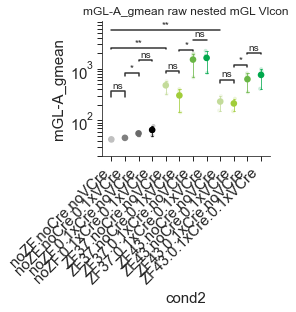

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

noZF.noCre.noVCre v.s. noZF.noCre.0.1xVCre: t-test independent samples, P_val=3.376e-01 stat=-1.088e+00
noZF.noCre.0.1xVCre v.s. noZF.0.1xCre.noVCre: t-test independent samples, P_val=3.437e-01 stat=1.073e+00
noZF.0.1xCre.noVCre v.s. noZF.0.1xCre.0.1xVCre: t-test independent samples, P_val=3.974e-01 stat=-9.468e-01
ZF37.noCre.noVCre v.s. ZF37.noCre.0.1xVCre: t-test independent samples, P_val=4.518e-01 stat=-8.328e-01
ZF37.noCre.0.1xVCre v.s. ZF37.0.1xCre.noVCre: t-test independent samples, P_val=7.063e-03 stat=5.084e+00
ZF37.0.1xCre.noVCre v.s. ZF37.0.1xCre.0.1xVCre: t-test independent samples, P_val=5.200e-01 stat=-7.045e-01
ZF43.noCre.noVCre v.s. ZF43.noCre.0.1xVCre: t-test independent samples, P_val=7.132e-02 stat=-2.439e+00
ZF43.noCre.0.1xVCre v.s. ZF43.0.1xCre.noVCre: t-test independent samples, P_val=2.744e-04 stat=1.2

<Figure size 432x288 with 0 Axes>

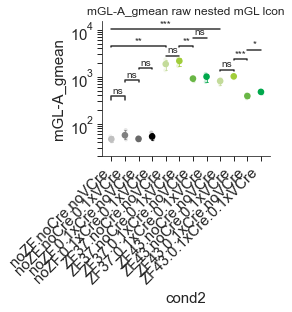

KeyError: 'mGL-A'

<Figure size 432x288 with 0 Axes>

In [ ]:
# final fig 1 plot
palette = {'noZF.noCre.noVCre': 'silver', 
       'noZF.noCre.0.1xVCre': 'gray' ,
       'noZF.0.1xCre.noVCre': 'dimgray',
        'noZF.0.1xCre.0.1xVCre': 'black',
       'ZF37.noCre.noVCre': '#C3DB9A', 
       'ZF37.noCre.0.1xVCre': '#A1CD3A' ,
       'ZF37.0.1xCre.noVCre': '#69B645',
        'ZF37.0.1xCre.0.1xVCre': '#00A84C',
           'ZF43.noCre.noVCre': '#C3DB9A', 
           'ZF43.noCre.0.1xVCre': '#A1CD3A', 
           'ZF43.0.1xCre.noVCre': '#69B645',
              'ZF43.0.1xCre.0.1xVCre': '#00A84C',
       }


ZFs = pd.array(['ZF37','ZF43', 'noZF'])
#Only plot some reporters
repts = pd.array(['pTET80-2_nested_short','pTET114_VloxPcon','pTET57B_loxPcon'])

#rept short names
rept_short_name = {'pTET80-1_nested_long': '1-lng', 'pTET80-2_nested_short': '2-sh',  'pTET114_VloxPcon': 'Vlcon', 'pTET57B_loxPcon':'lcon'}

hue = None; 
hue_order = None

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean'])
#set plotting parameters 
order_repts = repts
order = palette;   x = 'cond2'; 
ylim = [2e1, 4e3]


#display(data_now)

#Set p-value significance comparisons 
pairs = [
    [('noZF.noCre.noVCre'), ('noZF.noCre.0.1xVCre')], 
         [('noZF.0.1xCre.noVCre'), ('noZF.noCre.0.1xVCre')],  
        [('noZF.0.1xCre.noVCre'), ('noZF.0.1xCre.0.1xVCre')],
    [('ZF37.noCre.noVCre'), ('noZF.noCre.noVCre')],
    [('ZF43.noCre.noVCre'), ('noZF.noCre.noVCre')],
         [('ZF37.noCre.noVCre'), ('ZF37.noCre.0.1xVCre')], 
         [('ZF37.0.1xCre.noVCre'), ('ZF37.noCre.0.1xVCre')],  
        [('ZF37.0.1xCre.noVCre'), ('ZF37.0.1xCre.0.1xVCre')],  
         [('ZF43.noCre.noVCre'), ('ZF43.noCre.0.1xVCre')], 
         [('ZF43.0.1xCre.noVCre'), ('ZF43.noCre.0.1xVCre')],  
         [('ZF43.0.1xCre.noVCre'), ('ZF43.0.1xCre.0.1xVCre')],  
]

fontsize=15; xsize=3; ysize=2.5
markers = pd.array(['o','o','o','o','o','o','o','o','o','o','o','o'])

for rept in repts:
    rept_name = rept_short_name[rept]
    for stat in stats_plot:
        
        data_now = s_biorep[ s_biorep['ZF'].isin(ZFs)]
        data_now = data_now[ data_now['reporter']==rept]
        y = stat # set the stat to plot
        yscale = 'log'
        plottitle = y + ' raw nested mGL ' + rept_name
        g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                        pairs=pairs, 
                        yscale=yscale, dodge=False,
                        figsize = [xsize,ysize],
                        ylim=ylim, markers=markers,
                        x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,
                        fontsize=fontsize)
        g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

data_save = s_biorep[s_biorep['reporter'].isin(repts)]
data_save.to_excel('Fig1H-I_S7_nested.xlsx', index=False)




In [14]:
# Display number of reps 
df = data_save
by = ['reporter', 'ZF', 'Cre','VCre','cond', 'cond2'] #how to filter results, columns 
x = ['mGL-A_gmean'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s_datasavemeans = calc_stats(df,by,x,stat) #calculate statistics 
display(s_datasavemeans)

,reporter,ZF,Cre,VCre,cond,cond2,mGL-A_gmean_gmean,mGL-A_gmean_median,mGL-A_gmean_std,mGL-A_gmean_mean,Fraction,Count
0,pTET114_VloxPcon,ZF37,0.1xCre,0.1xVCre,pTET114_VloxPcon.ZF37.0.1xCre.0.1xVCre,ZF37.0.1xCre.0.1xVCre,1500.793013,1818.241696,716.972491,1627.146666,1.0,3
1,pTET114_VloxPcon,ZF37,0.1xCre,noVCre,pTET114_VloxPcon.ZF37.0.1xCre.noVCre,ZF37.0.1xCre.noVCre,1361.989018,1881.017690,718.474413,1510.540766,1.0,3
2,pTET114_VloxPcon,ZF37,noCre,0.1xVCre,pTET114_VloxPcon.ZF37.noCre.0.1xVCre,ZF37.noCre.0.1xVCre,276.547979,366.341357,141.069306,304.389814,1.0,3
3,pTET114_VloxPcon,ZF37,noCre,noVCre,pTET114_VloxPcon.ZF37.noCre.noVCre,ZF37.noCre.noVCre,463.263598,536.457918,136.044532,477.905441,1.0,3
4,pTET114_VloxPcon,ZF43,0.1xCre,0.1xVCre,pTET114_VloxPcon.ZF43.0.1xCre.0.1xVCre,ZF43.0.1xCre.0.1xVCre,711.493204,892.120320,308.080109,762.114826,1.0,3
5,pTET114_VloxPcon,ZF43,0.1xCre,noVCre,pTET114_VloxPcon.ZF43.0.1xCre.noVCre,ZF43.0.1xCre.noVCre,590.694656,721.057043,245.618456,628.971754,1.0,3
6,pTET114_VloxPcon,ZF43,noCre,0.1xVCre,pTET114_VloxPcon.ZF43.noCre.0.1xVCre,ZF43.noCre.0.1xVCre,207.350885,226.043356,57.595566,212.992262,1.0,3
7,pTET114_VloxPcon,ZF43,noCre,noVCre,pTET114_VloxPcon.ZF43.noCre.noVCre,ZF43.noCre.noVCre,223.812706,245.142557,70.927560,231.720431,1.0,3
8,pTET114_VloxPcon,noZF,0.1xCre,0.1xVCre,pTET114_VloxPcon.noZF.0.1xCre.0.1xVCre,noZF.0.1xCre.0.1xVCre,64.148386,67.170076,13.891871,65.181072,1.0,3
9,pTET114_VloxPcon,noZF,0.1xCre,noVCre,pTET114_VloxPcon.noZF.0.1xCre.noVCre,noZF.0.1xCre.noVCre,55.707131,58.268898,5.125691,55.869610,1.0,3


In [ ]:
s_biorep.columns.unique()

In [ ]:
s_biorep['cond'].unique()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

pTET80-2_nested_short.ZF37.noCre.0.1xVCre v.s. pTET114_VloxPcon.ZF37.noCre.0.1xVCre: t-test independent samples, P_val=1.397e-01 stat=1.839e+00
pTET80-2_nested_short.ZF37.0.1xCre.noVCre v.s. pTET57B_loxPcon.ZF37.0.1xCre.noVCre: t-test independent samples, P_val=5.196e-03 stat=5.538e+00
pTET80-2_nested_short.ZF43.noCre.0.1xVCre v.s. pTET114_VloxPcon.ZF43.noCre.0.1xVCre: t-test independent samples, P_val=4.860e-01 stat=7.666e-01
pTET80-2_nested_short.ZF43.0.1xCre.noVCre v.s. pTET57B_loxPcon.ZF43.0.1xCre.noVCre: t-test independent samples, P_val=2.093e-03 stat=7.087e+00


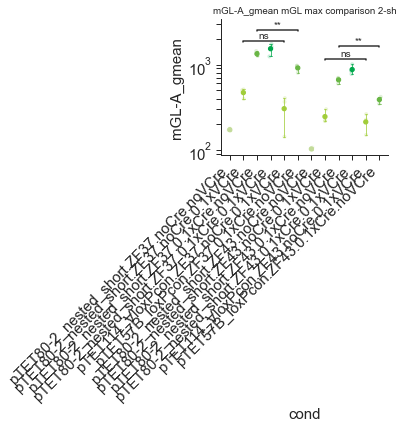

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

pTET80-2_nested_short.ZF37.noCre.0.1xVCre v.s. pTET114_VloxPcon.ZF37.noCre.0.1xVCre: t-test independent samples, P_val=1.397e-01 stat=1.839e+00
pTET80-2_nested_short.ZF37.0.1xCre.noVCre v.s. pTET57B_loxPcon.ZF37.0.1xCre.noVCre: t-test independent samples, P_val=5.196e-03 stat=5.538e+00
pTET80-2_nested_short.ZF43.noCre.0.1xVCre v.s. pTET114_VloxPcon.ZF43.noCre.0.1xVCre: t-test independent samples, P_val=4.860e-01 stat=7.666e-01
pTET80-2_nested_short.ZF43.0.1xCre.noVCre v.s. pTET57B_loxPcon.ZF43.0.1xCre.noVCre: t-test independent samples, P_val=2.093e-03 stat=7.087e+00


<Figure size 432x288 with 0 Axes>

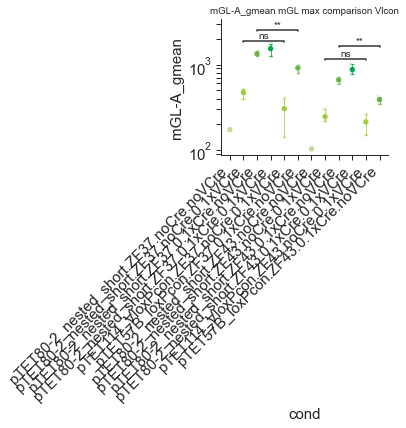

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

pTET80-2_nested_short.ZF37.noCre.0.1xVCre v.s. pTET114_VloxPcon.ZF37.noCre.0.1xVCre: t-test independent samples, P_val=1.397e-01 stat=1.839e+00
pTET80-2_nested_short.ZF37.0.1xCre.noVCre v.s. pTET57B_loxPcon.ZF37.0.1xCre.noVCre: t-test independent samples, P_val=5.196e-03 stat=5.538e+00
pTET80-2_nested_short.ZF43.noCre.0.1xVCre v.s. pTET114_VloxPcon.ZF43.noCre.0.1xVCre: t-test independent samples, P_val=4.860e-01 stat=7.666e-01
pTET80-2_nested_short.ZF43.0.1xCre.noVCre v.s. pTET57B_loxPcon.ZF43.0.1xCre.noVCre: t-test independent samples, P_val=2.093e-03 stat=7.087e+00


<Figure size 432x288 with 0 Axes>

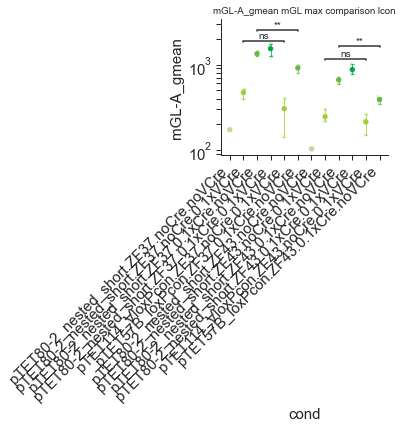

<Figure size 432x288 with 0 Axes>

In [ ]:
# final fig 1 plot
palette = {
       'pTET80-2_nested_short.ZF37.noCre.noVCre': '#C3DB9A', 
       'pTET80-2_nested_short.ZF37.noCre.0.1xVCre': '#A1CD3A' ,
       'pTET80-2_nested_short.ZF37.0.1xCre.noVCre': '#69B645',
        'pTET80-2_nested_short.ZF37.0.1xCre.0.1xVCre': '#00A84C',

       'pTET114_VloxPcon.ZF37.noCre.0.1xVCre': '#A1CD3A',
       'pTET57B_loxPcon.ZF37.0.1xCre.noVCre': '#69B645',

           'pTET80-2_nested_short.ZF43.noCre.noVCre': '#C3DB9A', 
           'pTET80-2_nested_short.ZF43.noCre.0.1xVCre': '#A1CD3A', 
           'pTET80-2_nested_short.ZF43.0.1xCre.noVCre': '#69B645',
              'pTET80-2_nested_short.ZF43.0.1xCre.0.1xVCre': '#00A84C',

              'pTET114_VloxPcon.ZF43.noCre.0.1xVCre': '#A1CD3A',
       'pTET57B_loxPcon.ZF43.0.1xCre.noVCre': '#69B645',


       }


ZFs = pd.array(['ZF37','ZF43', 'noZF'])
#Only plot some reporters

hue = None; 
hue_order = None

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean'])
#set plotting parameters 
order = palette;   x = 'cond'; 
#ylim = [2e1, 3e3]


#display(data_now)

#Set p-value significance comparisons 
pairs = [
        [('pTET80-2_nested_short.ZF37.noCre.0.1xVCre'), ('pTET114_VloxPcon.ZF37.noCre.0.1xVCre')], 
        [('pTET80-2_nested_short.ZF37.0.1xCre.noVCre'), ('pTET57B_loxPcon.ZF37.0.1xCre.noVCre')],  
        [('pTET80-2_nested_short.ZF43.noCre.0.1xVCre'), ('pTET114_VloxPcon.ZF43.noCre.0.1xVCre')], 
        [('pTET80-2_nested_short.ZF43.0.1xCre.noVCre'), ('pTET57B_loxPcon.ZF43.0.1xCre.noVCre')], 
]

fontsize=15; xsize=3; ysize=2.5
markers = pd.array(['o','o','o','o','o','o','o','o'])

for rept in repts:
    rept_name = rept_short_name[rept]
    for stat in stats_plot:
        
        data_now = s_biorep
        y = stat # set the stat to plot
        yscale = 'log'
        plottitle = y + ' mGL max comparison ' + rept_name
        g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                        pairs=pairs, 
                        yscale=yscale, 
                        figsize = [xsize,ysize],
                     #    ylim=ylim,
                        markers=markers,
                        x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,
                        fontsize=fontsize,legend=True)
        g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

noZF.noCre.noVCre v.s. noZF.noCre.0.1xVCre: t-test independent samples, P_val=3.376e-01 stat=-1.088e+00
noZF.noCre.0.1xVCre v.s. noZF.0.1xCre.noVCre: t-test independent samples, P_val=3.437e-01 stat=1.073e+00
noZF.0.1xCre.noVCre v.s. noZF.0.1xCre.0.1xVCre: t-test independent samples, P_val=3.974e-01 stat=-9.468e-01
ZF37.noCre.noVCre v.s. ZF37.noCre.0.1xVCre: t-test independent samples, P_val=4.518e-01 stat=-8.328e-01
ZF37.noCre.0.1xVCre v.s. ZF37.0.1xCre.noVCre: t-test independent samples, P_val=7.063e-03 stat=5.084e+00
ZF37.0.1xCre.noVCre v.s. ZF37.0.1xCre.0.1xVCre: t-test independent samples, P_val=5.200e-01 stat=-7.045e-01
ZF43.noCre.noVCre v.s. ZF43.noCre.0.1xVCre: t-test independent samples, P_val=7.132e-02 stat=-2.439e+00
ZF43.noCre.0.1xVCre v.s. ZF43.0.1xCre.noVCre: t-test independent samples, P_val=2.744e-04 stat=1.2

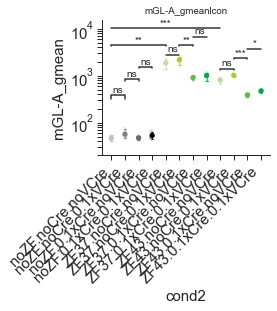

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

noZF.noCre.noVCre v.s. noZF.noCre.0.1xVCre: t-test independent samples, P_val=2.370e-01 stat=-1.390e+00
noZF.noCre.0.1xVCre v.s. noZF.0.1xCre.noVCre: t-test independent samples, P_val=3.467e-02 stat=-3.145e+00
noZF.0.1xCre.noVCre v.s. noZF.0.1xCre.0.1xVCre: t-test independent samples, P_val=3.373e-01 stat=-1.089e+00
ZF37.noCre.noVCre v.s. ZF37.noCre.0.1xVCre: t-test independent samples, P_val=1.999e-01 stat=1.534e+00
ZF37.noCre.0.1xVCre v.s. ZF37.0.1xCre.noVCre: t-test independent samples, P_val=4.624e-02 stat=-2.853e+00
ZF37.0.1xCre.noVCre v.s. ZF37.0.1xCre.0.1xVCre: t-test independent samples, P_val=8.520e-01 stat=-1.990e-01
ZF43.noCre.noVCre v.s. ZF43.noCre.0.1xVCre: t-test independent samples, P_val=7.405e-01 stat=3.550e-01
ZF43.noCre.0.1xVCre v.s. ZF43.0.1xCre.noVCre: t-test independent samples, P_val=4.612e-02 stat=-2.

<Figure size 432x288 with 0 Axes>

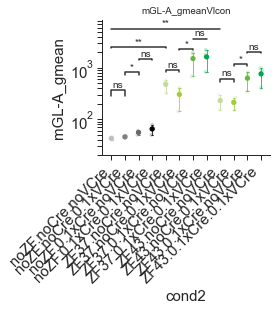

<Figure size 432x288 with 0 Axes>

In [ ]:
# final fig 1 plot
palette = {'noZF.noCre.noVCre': 'silver', 
       'noZF.noCre.0.1xVCre': 'gray' ,
       'noZF.0.1xCre.noVCre': 'dimgray',
        'noZF.0.1xCre.0.1xVCre': 'black',
       'ZF37.noCre.noVCre': '#C3DB9A', 
       'ZF37.noCre.0.1xVCre': '#A1CD3A' ,
       'ZF37.0.1xCre.noVCre': '#69B645',
        'ZF37.0.1xCre.0.1xVCre': '#00A84C',
           'ZF43.noCre.noVCre': '#C3DB9A', 
           'ZF43.noCre.0.1xVCre': '#A1CD3A', 
           'ZF43.0.1xCre.noVCre': '#69B645',
              'ZF43.0.1xCre.0.1xVCre': '#00A84C',
       }


ZFs = pd.array(['ZF37','ZF43', 'noZF'])
#Only plot some reporters
repts = pd.array(['pTET57B_loxPcon', 'pTET114_VloxPcon'])

#rept short names
rept_short_name = {'pTET80-1_nested_long': '1-lng', 'pTET80-2_nested_short': '2-sh',  'pTET114_VloxPcon': 'Vlcon', 'pTET57B_loxPcon':'lcon'}

hue = None; 
hue_order = None

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean'])
#set plotting parameters 
order_repts = repts
order = palette;   x = 'cond2'; 
ylim = [2e1, 4e3]


#display(data_now)

#Set p-value significance comparisons 
pairs = [
    [('noZF.noCre.noVCre'), ('noZF.noCre.0.1xVCre')], 
         [('noZF.0.1xCre.noVCre'), ('noZF.noCre.0.1xVCre')],  
        [('noZF.0.1xCre.noVCre'), ('noZF.0.1xCre.0.1xVCre')],
    [('ZF37.noCre.noVCre'), ('noZF.noCre.noVCre')],
    [('ZF43.noCre.noVCre'), ('noZF.noCre.noVCre')],
         [('ZF37.noCre.noVCre'), ('ZF37.noCre.0.1xVCre')], 
         [('ZF37.0.1xCre.noVCre'), ('ZF37.noCre.0.1xVCre')],  
        [('ZF37.0.1xCre.noVCre'), ('ZF37.0.1xCre.0.1xVCre')],  
         [('ZF43.noCre.noVCre'), ('ZF43.noCre.0.1xVCre')], 
         [('ZF43.0.1xCre.noVCre'), ('ZF43.noCre.0.1xVCre')],  
         [('ZF43.0.1xCre.noVCre'), ('ZF43.0.1xCre.0.1xVCre')],  
]

fontsize=15; xsize=3; ysize=2.5
markers = pd.array(['o','o','o','o','o','o','o','o','o','o','o','o'])

for rept in repts:
    rept_name = rept_short_name[rept]
    for stat in stats_plot:
        
        data_now = s_biorep[ s_biorep['ZF'].isin(ZFs)]
        data_now = data_now[ data_now['reporter']==rept]
        y = stat # set the stat to plot
        yscale = 'log'
        plottitle = y + rept_name
        g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                        pairs=pairs, dodge=False,
                        yscale=yscale, 
                        figsize = [xsize,ysize],
                        ylim=ylim, markers=markers,
                        x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,legend=True,
                        fontsize=fontsize)
        g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


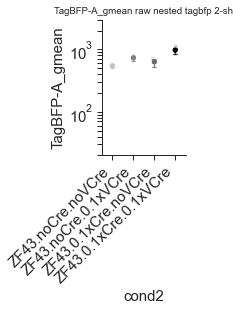

<Figure size 432x288 with 0 Axes>

In [ ]:
# final fig 1 plot
palette = {
#     'noZF.noCre.noVCre': 'silver', 
#        'noZF.noCre.0.1xVCre': 'gray' ,
#        'noZF.0.1xCre.noVCre': 'black',
#         'noZF.0.1xCre.0.1xVCre': 'black',
       # 'ZF37.noCre.noVCre': '#C3DB9A', 
       # 'ZF37.noCre.0.1xVCre': '#A1CD3A' ,
       # 'ZF37.0.1xCre.noVCre': '#69B645',
       #  'ZF37.0.1xCre.0.1xVCre': '#00A84C',
           'ZF43.noCre.noVCre': 'silver', 
           'ZF43.noCre.0.1xVCre': 'gray', 
           'ZF43.0.1xCre.noVCre': 'dimgray',
              'ZF43.0.1xCre.0.1xVCre': 'black',
       }


ZFs = pd.array(['ZF37','ZF43', 'noZF'])
#Only plot some reporters
repts = pd.array(['pTET80-2_nested_short'])

#rept short names
rept_short_name = {'pTET80-1_nested_long': '1-lng', 'pTET80-2_nested_short': '2-sh',  'pTET114_VloxPcon': 'Vlcon', 'pTET57B_loxPcon':'lcon'}

hue = None; 
hue_order = None

#List of stats to plot 
stats_plot = pd.array( ['TagBFP-A_gmean'])
#set plotting parameters 
order_repts = repts
order = palette;   x = 'cond2'; 
ylim = [2e1, 3e3]


#display(data_now)

#Set p-value significance comparisons 
pairs = [
        # [('ZF37.noCre.noVCre'), ('ZF37.noCre.0.1xVCre')], 
        # [('ZF37.0.1xCre.noVCre'), ('ZF37.noCre.0.1xVCre')],  
       #  [('ZF37.0.1xCre.noVCre'), ('ZF37.0.1xCre.0.1xVCre')],  
        # [('ZF43.noCre.noVCre'), ('ZF43.noCre.0.1xVCre')], 
        # [('ZF43.0.1xCre.noVCre'), ('ZF43.noCre.0.1xVCre')],  
       #   [('ZF43.0.1xCre.noVCre'), ('ZF43.0.1xCre.0.1xVCre')],  
]

fontsize=15; xsize=1.5; ysize=2.5
markers = pd.array(['o','o','o','o'])

for rept in repts:
    rept_name = rept_short_name[rept]
    for stat in stats_plot:
        
        data_now = s_biorep[ s_biorep['ZF'].isin(ZFs)]
        data_now = data_now[ data_now['reporter']==rept]
        y = stat # set the stat to plot
        yscale = 'log'
        plottitle = y + ' raw nested tagbfp ' + rept_name
        g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                        pairs=pairs, 
                        yscale=yscale, 
                        figsize = [xsize,ysize],
                        ylim=ylim, markers=markers,
                        x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,
                        fontsize=fontsize,legend=True)
        g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


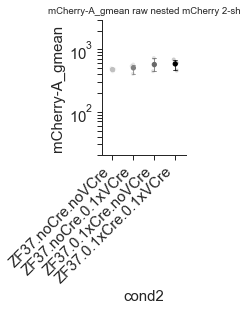

<Figure size 432x288 with 0 Axes>

In [ ]:
# final fig 1 plot
palette = {
#     'noZF.noCre.noVCre': 'silver', 
#        'noZF.noCre.0.1xVCre': 'gray' ,
#        'noZF.0.1xCre.noVCre': 'black',
#         'noZF.0.1xCre.0.1xVCre': 'black',
       'ZF37.noCre.noVCre': 'silver', 
       'ZF37.noCre.0.1xVCre': 'gray' ,
       'ZF37.0.1xCre.noVCre': 'dimgray',
        'ZF37.0.1xCre.0.1xVCre': 'black',
       #     'ZF43.noCre.noVCre': '#C3DB9A', 
       #     'ZF43.noCre.0.1xVCre': '#A1CD3A', 
       #     'ZF43.0.1xCre.noVCre': '#69B645',
       #        'ZF43.0.1xCre.0.1xVCre': '#00A84C',
       }


ZFs = pd.array(['ZF37','ZF43', 'noZF'])
#Only plot some reporters
repts = pd.array(['pTET80-2_nested_short'])

#rept short names
rept_short_name = {'pTET80-1_nested_long': '1-lng', 'pTET80-2_nested_short': '2-sh',  'pTET114_VloxPcon': 'Vlcon', 'pTET57B_loxPcon':'lcon'}

hue = None; 
hue_order = None

#List of stats to plot 
stats_plot = pd.array( ['mCherry-A_gmean'])
#set plotting parameters 
order_repts = repts
order = palette;   x = 'cond2'; 
ylim = [2e1, 3e3]


#display(data_now)

#Set p-value significance comparisons 
pairs = [
        # [('ZF37.noCre.noVCre'), ('ZF37.noCre.0.1xVCre')], 
        # [('ZF37.0.1xCre.noVCre'), ('ZF37.noCre.0.1xVCre')],  
       #  [('ZF37.0.1xCre.noVCre'), ('ZF37.0.1xCre.0.1xVCre')],  
        # [('ZF43.noCre.noVCre'), ('ZF43.noCre.0.1xVCre')], 
        # [('ZF43.0.1xCre.noVCre'), ('ZF43.noCre.0.1xVCre')],  
       #   [('ZF43.0.1xCre.noVCre'), ('ZF43.0.1xCre.0.1xVCre')],  
]

fontsize=15; xsize=1.5; ysize=2.5
markers = pd.array(['o','o','o','o'])

for rept in repts:
    rept_name = rept_short_name[rept]
    for stat in stats_plot:
        
        data_now = s_biorep[ s_biorep['ZF'].isin(ZFs)]
        data_now = data_now[ data_now['reporter']==rept]
        y = stat # set the stat to plot
        yscale = 'log'
        plottitle = y + ' raw nested mCherry ' + rept_name
        g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                        pairs=pairs, 
                        yscale=yscale, 
                        figsize = [xsize,ysize],
                        ylim=ylim, markers=markers,
                        x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,
                        fontsize=fontsize,legend=True)
        g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


# Normalized (fold change) expression to -Cre within each biorep

In [ ]:
display(s_biorep)

## Get data only for reporter chosen

In [21]:
s_bioreps = s_biorep
col_keep = ['reporter', 'ZF', 'Cre', 'VCre', 'cond2', 'bioreplicate', 'mGL-A_gmean']
s_short = s_bioreps[s_bioreps['reporter']=='pTET80-2_nested_short']
s_short = s_short[col_keep]
s_short['bioreplicate.ZF'] = s_short['bioreplicate'] + '.' + s_short['ZF']
display(s_short)

,reporter,ZF,Cre,VCre,cond2,bioreplicate,mGL-A_gmean,bioreplicate.ZF
108,pTET80-2_nested_short,ZF37,0.1xCre,0.1xVCre,ZF37.0.1xCre.0.1xVCre,BioA,1243.059707,BioA.ZF37
109,pTET80-2_nested_short,ZF37,0.1xCre,0.1xVCre,ZF37.0.1xCre.0.1xVCre,BioB,1610.374441,BioB.ZF37
110,pTET80-2_nested_short,ZF37,0.1xCre,0.1xVCre,ZF37.0.1xCre.0.1xVCre,BioC,1738.570965,BioC.ZF37
111,pTET80-2_nested_short,ZF37,0.1xCre,noVCre,ZF37.0.1xCre.noVCre,BioA,1311.661407,BioA.ZF37
112,pTET80-2_nested_short,ZF37,0.1xCre,noVCre,ZF37.0.1xCre.noVCre,BioB,1438.326111,BioB.ZF37
113,pTET80-2_nested_short,ZF37,0.1xCre,noVCre,ZF37.0.1xCre.noVCre,BioC,1260.723229,BioC.ZF37
114,pTET80-2_nested_short,ZF37,noCre,0.1xVCre,ZF37.noCre.0.1xVCre,BioA,395.139640,BioA.ZF37
115,pTET80-2_nested_short,ZF37,noCre,0.1xVCre,ZF37.noCre.0.1xVCre,BioB,511.218120,BioB.ZF37
116,pTET80-2_nested_short,ZF37,noCre,0.1xVCre,ZF37.noCre.0.1xVCre,BioC,500.469980,BioC.ZF37
117,pTET80-2_nested_short,ZF37,noCre,noVCre,ZF37.noCre.noVCre,BioA,168.795267,BioA.ZF37


## Fold change to +ZF43 / -Cre

In [23]:
# Normalized summary plots with 3 bioreps to within spacer, +ZF -Cre


s_normalized = pd.DataFrame()
bioreps_plot = pd.array(['BioA', 'BioB', 'BioC'])
for biorep in bioreps_plot:
    s_biorep = s_short[s_short['bioreplicate'] == biorep] #choose dataframe

    if not s_biorep[(s_biorep['Cre']=='noCre') & (s_biorep['VCre']=='noVCre') & (s_biorep['ZF']=='noZF')].empty:
            noZF_noRec = s_biorep[(s_biorep['Cre']=='noCre') & (s_biorep['VCre']=='noVCre') & (s_biorep['ZF']=='noZF')]['mGL-A_gmean'].iloc[0]
            display(noZF_noRec)
    
    if not s_biorep[(s_biorep['Cre']=='noCre') & (s_biorep['VCre']=='noVCre') & (s_biorep['ZF']=='ZF37')].empty:
            ZF37_noRec = s_biorep[(s_biorep['Cre']=='noCre') & (s_biorep['VCre']=='noVCre') & (s_biorep['ZF']=='ZF37')]['mGL-A_gmean'].iloc[0]
            display(ZF37_noRec)

    if not s_biorep[(s_biorep['Cre']=='noCre') & (s_biorep['VCre']=='noVCre') & (s_biorep['ZF']=='ZF43')].empty:
            ZF43_noRec = s_biorep[(s_biorep['Cre']=='noCre') & (s_biorep['VCre']=='noVCre') & (s_biorep['ZF']=='ZF43')]['mGL-A_gmean'].iloc[0]
            display(ZF43_noRec)

    def normalize_mGL_gmean(row):
        if row['ZF'] == 'noZF':
            return row['mGL-A_gmean'] / noZF_noRec
        if row['ZF'] == 'ZF37':
            return row['mGL-A_gmean'] / ZF37_noRec
        if row['ZF'] == 'ZF43':
            return row['mGL-A_gmean'] / ZF43_noRec
            
    s_biorep['Normalized_mGL-A_gmean'] = s_biorep.apply(normalize_mGL_gmean, axis=1)

    s_normalized = pd.concat([s_normalized, s_biorep], ignore_index=True)

display(s_normalized)


39.02493339733238

168.7952672353019

101.45890145844169

<ipython-input-23-eb4233ec81ee>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_biorep['Normalized_mGL-A_gmean'] = s_biorep.apply(normalize_mGL_gmean, axis=1)


42.14895649604978

170.97503518531278

100.46610532771062

40.43124594760867

178.59250596861676

106.94258465765162

,reporter,ZF,Cre,VCre,cond2,bioreplicate,mGL-A_gmean,bioreplicate.ZF,Normalized_mGL-A_gmean
0,pTET80-2_nested_short,ZF37,0.1xCre,0.1xVCre,ZF37.0.1xCre.0.1xVCre,BioA,1243.059707,BioA.ZF37,7.364304
1,pTET80-2_nested_short,ZF37,0.1xCre,noVCre,ZF37.0.1xCre.noVCre,BioA,1311.661407,BioA.ZF37,7.770724
2,pTET80-2_nested_short,ZF37,noCre,0.1xVCre,ZF37.noCre.0.1xVCre,BioA,395.139640,BioA.ZF37,2.340940
3,pTET80-2_nested_short,ZF37,noCre,noVCre,ZF37.noCre.noVCre,BioA,168.795267,BioA.ZF37,1.000000
4,pTET80-2_nested_short,ZF43,0.1xCre,0.1xVCre,ZF43.0.1xCre.0.1xVCre,BioA,773.472115,BioA.ZF43,7.623502
5,pTET80-2_nested_short,ZF43,0.1xCre,noVCre,ZF43.0.1xCre.noVCre,BioA,597.419943,BioA.ZF43,5.888295
6,pTET80-2_nested_short,ZF43,noCre,0.1xVCre,ZF43.noCre.0.1xVCre,BioA,218.663372,BioA.ZF43,2.155192
7,pTET80-2_nested_short,ZF43,noCre,noVCre,ZF43.noCre.noVCre,BioA,101.458901,BioA.ZF43,1.000000
8,pTET80-2_nested_short,noZF,0.1xCre,0.1xVCre,noZF.0.1xCre.0.1xVCre,BioA,59.853430,BioA.noZF,1.533723
9,pTET80-2_nested_short,noZF,0.1xCre,noVCre,noZF.0.1xCre.noVCre,BioA,56.930485,BioA.noZF,1.458823


In [28]:
# Normalized summary plots with 3 bioreps to +ZF -Cre of ZF43

bioreps_plot = pd.array(['BioA', 'BioB', 'BioC'])

s_normalized = pd.DataFrame()

for biorep in bioreps_plot:
    s_biorep = s_short[s_short['bioreplicate'] == biorep] #choose dataframe
    
    if not s_biorep[(s_biorep['Cre']=='noCre') & (s_biorep['VCre']=='noVCre') & 
    (s_biorep['ZF']=='ZF43')].empty:
            ZF43_noRec = s_biorep[(s_biorep['Cre']=='noCre') & (s_biorep['VCre']=='noVCre') & (s_biorep['ZF']=='ZF43')]['mGL-A_gmean'].iloc[0]
            display(ZF37_noRec)

    def normalize_mGL_gmean(row):
        if row['ZF'] == 'noZF':
            return row['mGL-A_gmean'] / ZF43_noRec
        if row['ZF'] == 'ZF37':
            return row['mGL-A_gmean'] / ZF43_noRec
        if row['ZF'] == 'ZF43':
            return row['mGL-A_gmean'] / ZF43_noRec
            
    s_biorep['Normalized_mGL-A_gmean'] = s_biorep.apply(normalize_mGL_gmean, axis=1)

    s_normalized = pd.concat([s_normalized, s_biorep], ignore_index=True)

display(s_normalized)
s_normalized.to_excel('Fig1I_nested-normalized.xlsx',index=False)

178.59250596861676

<ipython-input-28-481b300dfe5d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_biorep['Normalized_mGL-A_gmean'] = s_biorep.apply(normalize_mGL_gmean, axis=1)


178.59250596861676

178.59250596861676

,reporter,ZF,Cre,VCre,cond2,bioreplicate,mGL-A_gmean,bioreplicate.ZF,Normalized_mGL-A_gmean
0,pTET80-2_nested_short,ZF37,0.1xCre,0.1xVCre,ZF37.0.1xCre.0.1xVCre,BioA,1243.059707,BioA.ZF37,12.251855
1,pTET80-2_nested_short,ZF37,0.1xCre,noVCre,ZF37.0.1xCre.noVCre,BioA,1311.661407,BioA.ZF37,12.928007
2,pTET80-2_nested_short,ZF37,noCre,0.1xVCre,ZF37.noCre.0.1xVCre,BioA,395.139640,BioA.ZF37,3.894578
3,pTET80-2_nested_short,ZF37,noCre,noVCre,ZF37.noCre.noVCre,BioA,168.795267,BioA.ZF37,1.663681
4,pTET80-2_nested_short,ZF43,0.1xCre,0.1xVCre,ZF43.0.1xCre.0.1xVCre,BioA,773.472115,BioA.ZF43,7.623502
5,pTET80-2_nested_short,ZF43,0.1xCre,noVCre,ZF43.0.1xCre.noVCre,BioA,597.419943,BioA.ZF43,5.888295
6,pTET80-2_nested_short,ZF43,noCre,0.1xVCre,ZF43.noCre.0.1xVCre,BioA,218.663372,BioA.ZF43,2.155192
7,pTET80-2_nested_short,ZF43,noCre,noVCre,ZF43.noCre.noVCre,BioA,101.458901,BioA.ZF43,1.000000
8,pTET80-2_nested_short,noZF,0.1xCre,0.1xVCre,noZF.0.1xCre.0.1xVCre,BioA,59.853430,BioA.noZF,0.589928
9,pTET80-2_nested_short,noZF,0.1xCre,noVCre,noZF.0.1xCre.noVCre,BioA,56.930485,BioA.noZF,0.561119


## Plot normalized to +ZF43 no recombinase

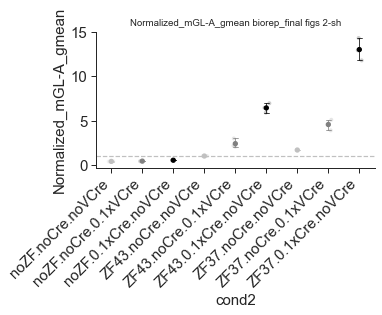

<Figure size 432x288 with 0 Axes>

In [26]:
# final fig 1 plot
palette = {
        'noZF.noCre.noVCre': 'silver' ,
       'noZF.noCre.0.1xVCre': 'gray' ,
       'noZF.0.1xCre.noVCre': 'black',
       #'noZF.0.1xCre.0.1xVCre': 'black',



        #         'ZF43.noCre.noVCre': '#C3DB9A' ,
        #    'ZF43.noCre.0.1xVCre': '#A1CD3A', 
        #    'ZF43.0.1xCre.noVCre': '#69B645',

                    'ZF43.noCre.noVCre': 'silver' ,
           'ZF43.noCre.0.1xVCre': 'gray', 
           'ZF43.0.1xCre.noVCre': 'black',
        #       'ZF43.0.1xCre.0.1xVCre': 'darkblue',

    #             'ZF37.noCre.noVCre': '#C3DB9A' ,
    #    'ZF37.noCre.0.1xVCre': '#A1CD3A' ,
    #    'ZF37.0.1xCre.noVCre': '#69B645',


                'ZF37.noCre.noVCre': 'silver' ,
       'ZF37.noCre.0.1xVCre': 'gray' ,
       'ZF37.0.1xCre.noVCre': 'black',

       #'ZF37.0.1xCre.0.1xVCre': 'darkred',
       }


ZFs = pd.array(['ZF43', 'ZF37', 'noZF'])
#Only plot some reporters
repts = pd.array(['pTET80-2_nested_short'])

#rept short names
rept_short_name = { 'pTET80-2_nested_short': '2-sh'}

hue = None; 
hue_order = None

#List of stats to plot 
stats_plot = pd.array( ['Normalized_mGL-A_gmean'])
#set plotting parameters 
order_repts = repts
order = palette;   x = 'cond2'; 


#display(data_now)

markers = pd.array(['o','o','o','o','o','o','o','o','o'])
fontsize=15; xsize=5; ysize=2.5

for rept in repts:
    rept_name = rept_short_name[rept]
    for stat in stats_plot:
        
        data_now = s_normalized[ s_normalized['ZF'].isin(ZFs)]
        data_now = data_now[ data_now['reporter']==rept]
        y = stat # set the stat to plot
        yscale = 'linear'
        plottitle = y + ' biorep_final figs ' + rept_name
        plt.figure(figsize=(xsize,ysize))
        plt.axhline(y=1, ls='--', color='silver')
        g = summary_plot( x=x, y=y, hue=hue, data=data_now, dodge=False,
                        yscale=yscale, markers=markers,
                        x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle, scientific=False,
                        fontsize=fontsize,legend=True)
        g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


## Fold change for each ZF to the +VCre condition

In [ ]:
map_VCre = {'test': 4}
s_VCre_norm = s_short

for bioZF in pd.unique(s_VCre_norm['bioreplicate.ZF']):
    s_now = s_VCre_norm[ (s_VCre_norm['bioreplicate.ZF']==bioZF) 
                        & (s_VCre_norm['VCre']=='0.1xVCre')
                        & (s_VCre_norm['Cre']=='noCre')]
    map_VCre[bioZF] = s_now['mGL-A_gmean'].iloc[0]

s_VCre_norm['VCre only value'] = s_VCre_norm['bioreplicate.ZF'].map(map_VCre)
s_VCre_norm['norm to VCre only'] =s_VCre_norm['mGL-A_gmean'] / s_VCre_norm['VCre only value']

#mean it up across bios
by = ['reporter', 'ZF', 'Cre','VCre', 'cond2'] #how to filter results, columns 
x = ['norm to VCre only'] #which parameter to calculate results on
stat = [np.mean] #statistics to calculate
s_VCre_norm_mean = calc_stats(s_VCre_norm,by,x,stat)
s_VCre_norm_mean['1 / norm to VCre only'] = 1/s_VCre_norm_mean['norm to VCre only_mean']
display(s_VCre_norm_mean)

,reporter,ZF,Cre,VCre,cond2,norm to VCre only_mean,Fraction,Count,1 / norm to VCre only
0,pTET80-2_nested_short,ZF37,0.1xCre,0.1xVCre,ZF37.0.1xCre.0.1xVCre,3.256608,1.0,3,0.307068
1,pTET80-2_nested_short,ZF37,0.1xCre,noVCre,ZF37.0.1xCre.noVCre,2.884031,1.0,3,0.346737
2,pTET80-2_nested_short,ZF37,noCre,0.1xVCre,ZF37.noCre.0.1xVCre,1.000000,1.0,3,1.000000
3,pTET80-2_nested_short,ZF37,noCre,noVCre,ZF37.noCre.noVCre,0.372825,1.0,3,2.682224
4,pTET80-2_nested_short,ZF43,0.1xCre,0.1xVCre,ZF43.0.1xCre.0.1xVCre,3.646695,1.0,3,0.274221
5,pTET80-2_nested_short,ZF43,0.1xCre,noVCre,ZF43.0.1xCre.noVCre,2.736121,1.0,3,0.365481
6,pTET80-2_nested_short,ZF43,noCre,0.1xVCre,ZF43.noCre.0.1xVCre,1.000000,1.0,3,1.000000
7,pTET80-2_nested_short,ZF43,noCre,noVCre,ZF43.noCre.noVCre,0.429134,1.0,3,2.330277
8,pTET80-2_nested_short,noZF,0.1xCre,0.1xVCre,noZF.0.1xCre.0.1xVCre,1.350546,1.0,3,0.740441
9,pTET80-2_nested_short,noZF,0.1xCre,noVCre,noZF.0.1xCre.noVCre,1.246025,1.0,3,0.802552
